# 数値微分のscipy実装：derivative


pythonモジュールのscipyには，**1変数スカラー値**関数の数値微分を行うderivativeがある．
これを使って数値微分の計算を行う．

In [1]:
from scipy.misc import derivative

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## シグモイド

まずは普通のnumpyでsigmoid関数を実装し，プロットしてみる

In [3]:
# numpyでシグモイド関数を実装
def sig(x):
    return 1 / (1 + np.exp(-x))

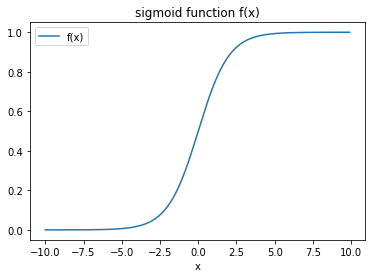

In [4]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, sig(x), label="f(x)")
plt.title("sigmoid function f(x)")
plt.xlabel("x")
plt.legend()
plt.show()

次にscipyのderivativeでsigmoid関数の微分を実装する．

第1引数には関数，第2引数には評価する点`x`，第3引数には微小幅`dx`を指定．dxには1e-6程度を指定．

In [5]:
def grad_sig(x, n=1):
    return derivative(sig, x, dx=1e-6, n=n) # n次導関数を計算

In [6]:
grad_sig(1.0) # 値が計算できる

0.19661193317865866

元の関数と同様にプロットしてみる．

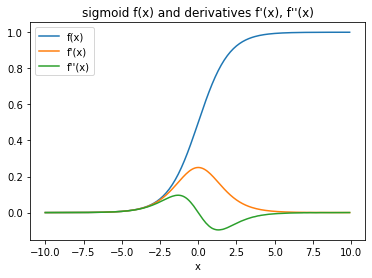

In [7]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, sig(x), label="f(x)")
plt.plot(x, grad_sig(x), label="f'(x)")
plt.plot(x, grad_sig(x, n=2), label="f''(x)")
plt.title("sigmoid f(x) and derivatives f'(x), f''(x)")
plt.xlabel("x")
plt.legend()
plt.show()

## 不連続関数の場合

dxを1にして実行してみる．不連続点をまたいで数値評価をするため，その周囲では微分が正しくない．

In [8]:
def f(x):
    if x >= 0: # xはスカラーのみ．arrayは不可
        return x
    else:
        return x * np.exp(x) - 1

In [9]:
def grad_f(x, dx=1.0): # dxを1.0にした
    return derivative(f, x, dx=dx)

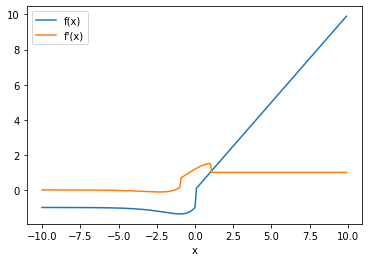

In [10]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, [f(xi) for xi in x], label="f(x)")
plt.plot(x, [grad_f(xi) for xi in x], label="f'(x)")
plt.xlabel("x")
plt.legend()
plt.show()

# Task


## dxの変更

上記の不連続関数の場合に，dxを変化させて，どのように微分が変化するか，またその変化はなぜかを議論せよ．



## ヤコビ行列

$\boldsymbol{f}(\boldsymbol{p}) =
                \begin{pmatrix}
                a \sin(bx+c) \\ a\cos(bx+c)
                \end{pmatrix},
			\boldsymbol{p}=
                \begin{pmatrix}
                 a \\ b \\ c
                \end{pmatrix}            
$
を考える．この関数のヤコビ行列を数値微分で求める関数を実装せよ．

また手作業で式を微分しヤコビ行列関数を求めて通常の関数として実装せよ．
この2つのヤコビ行列関数にランダムな入力を多数回入力して，
ただしdxをどの程度小さくすれば
出力が毎回一致するのかを議論せよ．




